In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import plotly

In [168]:
train = pd.read_csv('/home/ada/teacherOn/Ola McCartney/Intermediate ML/datasets/house_train.csv')
test = pd.read_csv('/home/ada/teacherOn/Ola McCartney/Intermediate ML/datasets/house_test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [171]:
# split dependent/independent variables from the train dataset
train_independent = train.iloc[:, 0:-1]
train_dependent = train.iloc[:, -1]

# merging the 2 datasets for uniform preprocessing

# identify the categorical and numerical columns 
numerical_features = []
categorical_features = []
for column in train_independent.columns:
    if train_independent[column].dtype in ['int16', 'int32', 'int64', 'float64']:
        numerical_features.append(column)
    elif train_independent[column].dtype == object:
        categorical_features.append(column)

columns = categorical_features + numerical_features
train_independent = train[columns]
test = test[columns]

#merging test and train independent variables
features = pd.concat([train_independent, test], axis = 0)

# shapes
print('train features :', train_independent.shape)
print('train target :', train_dependent.shape)
print('test features :', test.shape)
print('train dataset :', train.shape)
print('all features :', features.shape)

train features : (1460, 80)
train target : (1460,)
test features : (1459, 80)
train dataset : (1460, 81)
all features : (2919, 80)


### Null Values

In [172]:
#Numerical features with null values > 0
null = (features[numerical_features].isna().sum().sort_values(ascending = False)/features.shape[0])*100
null_values = pd.DataFrame(null, columns = ['perc'])
null_values

# # visual representation
# plt.figure(figsize = (13, 4))
# plt.xticks(rotation = 60)
# sns.barplot(x = null_values.index, y = null_values['perc'])

,perc
LotFrontage,16.649538
GarageYrBlt,5.447071
MasVnrArea,0.787941
BsmtHalfBath,0.068517
BsmtFullBath,0.068517
GarageArea,0.034258
BsmtFinSF1,0.034258
BsmtFinSF2,0.034258
BsmtUnfSF,0.034258
TotalBsmtSF,0.034258


* **lotfrantage**: We could check feature with highest correlation w/lotfrontage and fill the missing values with mean of lot frontage of houses grouped by the feature with the highest correlation but this leaves out the categorical variables which have not been encoded yet. So, neighborhood makes the most sense.
* **GarageYrBlt, GarageCars, GarageArea, GarageQual**: going to assume no garages.
* **Bsmts**: assuming no basements.
* **MasonVeneer Area**: No Type, no area.

In [173]:
features['GarageYrBlt'] = features['GarageYrBlt'].fillna(0)
features['GarageCars'] = features['GarageCars'].fillna(0)
features['GarageArea'] = features['GarageArea'].fillna(0)
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)
features['BsmtFullBath'] = features['BsmtFullBath'].fillna(0)
features['BsmtHalfBath'] = features['BsmtHalfBath'].fillna(0)
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)
features['BsmtUnfSF'] = features['BsmtUnfSF'].fillna(0)
features['BsmtFinSF2'] = features['BsmtFinSF2'].fillna(0)
features['BsmtFinSF1'] = features['BsmtFinSF1'].fillna(0)

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

# groupby
# mean
# imputation


#checking for anymore missing values
features[numerical_features].isna().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [174]:
# features.shape[1]

In [175]:
#categorical features with null values > 0
null = (features[categorical_features].isna().sum().sort_values(ascending = False)/features.shape[0])*100
null_values = pd.DataFrame(null, columns = ['perc'])
null_values

# # visual representation
# plt.figure(figsize = (13,4))
# plt.xticks(rotation = 60)
# sns.barplot(x = null_values.index, y = null_values.iloc[:,0])

,perc
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
GarageCond,5.447071
GarageQual,5.447071
GarageFinish,5.447071
GarageType,5.378554
BsmtCond,2.809181


In [176]:
features = features.drop(['PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu'], axis = 1)
features.shape

(2919, 75)

* **PoolQC, MiscFeature, Alley, Fence, FireplaceQu, Garage..., Bsmt..., and Utilities** == FIlling with a new value of 'Null' cause we're working with the assumption that they do not exist.

* The remaining categorical variables with missing values are imputed with column modes.

In [178]:
# introducing a new value == 'Null'
features['GarageCond'] = features['GarageCond'].fillna('Null')
features['GarageQual'] = features['GarageQual'].fillna('Null')
features['GarageFinish'] = features['GarageFinish'].fillna('Null')
features['GarageType'] = features['GarageType'].fillna('Null')
features['BsmtExposure'] = features['BsmtExposure'].fillna('Null')
features['BsmtCond'] = features['BsmtCond'].fillna('Null')
features['BsmtQual'] = features['BsmtQual'].fillna('Null')
features['BsmtFinType2'] = features['BsmtFinType2'].fillna('Null')
features['BsmtFinType1'] = features['BsmtFinType1'].fillna('Null')
features['Utilities'] = features['Utilities'].fillna('Null')

# mode imputation
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['Functional'] = features['Functional'].fillna(features['Functional'].mode()[0])
features['MasVnrType'] = features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

#checking for remaining null values
features.isna().any()

MSZoning       False
Street         False
LotShape       False
LandContour    False
Utilities      False
               ...  
ScreenPorch    False
PoolArea       False
MiscVal        False
MoSold         False
YrSold         False
Length: 75, dtype: bool

### Feature Generation

In [181]:
features['age'] = features['YrSold'].astype(int) - features['YearBuilt'].astype(int)
features['remod_age'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)
features['extra_rooms'] = features['TotRmsAbvGrd'] - features['BedroomAbvGr'] - features['KitchenAbvGr']
features['floors_area'] = features['1stFlrSF'] + features['2ndFlrSF']
features['total_bathrooms'] = features['FullBath'] + (0.5 * features['HalfBath']) + features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath'])
features['porch_area'] = features['WoodDeckSF'] + features['OpenPorchSF'] + features['EnclosedPorch'] + features['3SsnPorch'] + features['ScreenPorch'] + features['PoolArea']
features['walled_area'] = features['TotalBsmtSF'] +features['GrLivArea']
features['TotalOccupiedArea'] = features['walled_area'] + features['porch_area']

features.shape

(2919, 83)

In [105]:
features.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,MoSold,YrSold,age,remod_age,extra_rooms,floors_area,total_bathrooms,porch_area,walled_area,TotalOccupiedArea
0,RL,Pave,Null,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,2008,5,5,4,1710,3.5,61,2566.0,2627.0
1,RL,Pave,Null,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,5,2007,31,31,2,1262,2.5,298,2524.0,2822.0
2,RL,Pave,Null,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,9,2008,7,6,2,1786,3.5,42,2706.0,2748.0


### Multicolinearity

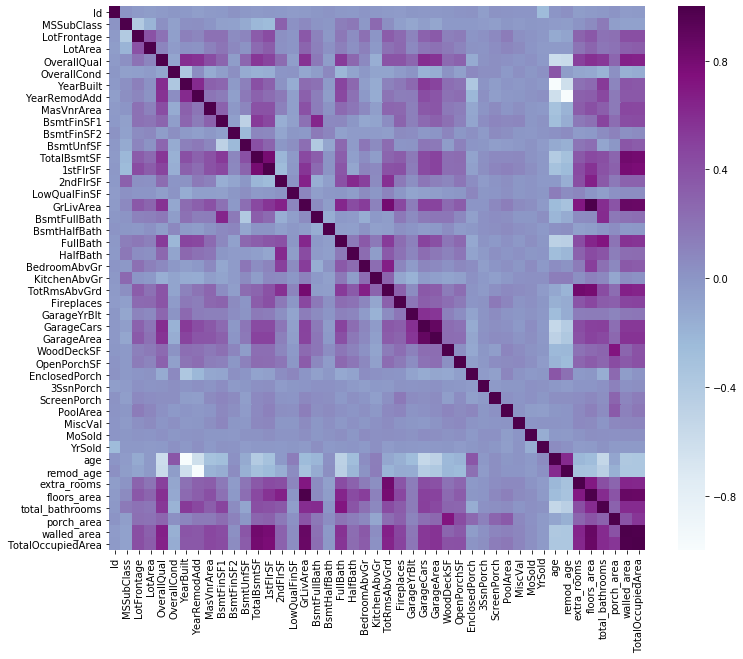

In [183]:
plt.figure(figsize = (12,10))
a = features.corr()
sns.heatmap(a, cmap = 'BuPu')

In [184]:
features = features.drop(['GarageCars','GrLivArea', 'walled_area'], axis = 1)
features.shape

(2919, 80)

### Encoding Categorical Variables

In [185]:
features = pd.get_dummies(features).reset_index(drop=True)
features.shape

(2919, 286)

In [109]:
# dropping features with predominant 0 values.
features_to_be_dropped = []
for feature in features.columns:
    all_value_counts = features[feature].value_counts()
    zero_value_counts = all_value_counts.iloc[0]
    if zero_value_counts / len(features) > 0.995:
        features_to_be_dropped.append(feature)

features = features.drop(features_to_be_dropped, axis=1).copy()
features.shape

(2919, 242)

### Normalization (Check for Skewness)

[Text(0.5, 1.0, 'SalePrice distribution')]

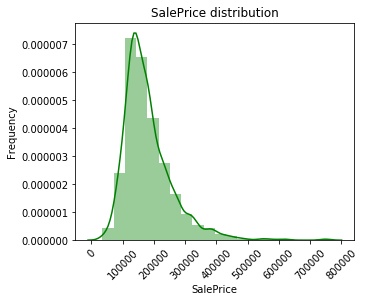

In [186]:
# target variable
# dependent variable
f, ax = plt.subplots(figsize=(5, 4))
sns.distplot(train_dependent, bins = 20, color = 'green')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
plt.xticks(rotation = 45)
ax.set(title="SalePrice distribution")

[Text(0.5, 1.0, 'SalePrice distribution')]

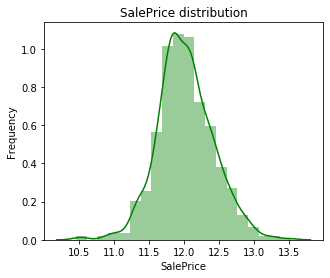

In [187]:
# log transformation (observe the change in scale and plot shape)
train_dependent = np.log1p(train_dependent)

#after transformation
f, ax = plt.subplots(figsize=(5, 4))
sns.distplot(train_dependent, bins = 20, color = 'green')
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

In [188]:
# other numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
features = pd.DataFrame(scaled_features, columns = features.columns)
print(features.shape)
features.head()

(2919, 286)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.731458,0.067331,-0.228511,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.529034,0.581145,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.730271,-0.873616,0.462234,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.567016,1.178255,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,-1.729084,0.067331,-0.090362,0.137197,0.646183,-0.507284,0.980221,0.848965,0.338903,0.098189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-1.727897,0.302568,-0.458760,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.567016,-0.494529,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,-1.726711,0.067331,0.646433,0.518903,1.355551,-0.507284,0.947203,0.753229,1.390216,0.469187,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


### Reconstructing Train and Test Sets

In [191]:
# train_dependent

In [113]:
x_train = features.iloc[0:1460, :]
x_test = features.iloc[1460:, :]

y_train = train_dependent

train_set = pd.concat([x_train, y_train], axis=1)

print('train features:', x_train.shape)
print('train target:', y_train.shape)
print('test features:', x_test.shape)
print('train set:', train_set.shape)

train features: (1460, 242)
train target: (1460,)
test features: (1459, 242)
train set: (1460, 243)


### Modeling

In [192]:
##splitting data set to get train and validation set from the train set
from sklearn.model_selection import train_test_split

X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size = .2)
X_train.shape, Y_train.shape, x_val.shape, y_val.shape

((1168, 242), (1168,), (292, 242), (292,))

#### Simple modeling

In [197]:
# simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# creating our model
regressor = LinearRegression()
rf = RandomForestRegressor(random_state = 42)

# model training/fitting
regressor = regressor.fit(X_train, Y_train)
# running predictions
y_pred = regressor.predict(x_val)

# model training/fitting
rf = rf.fit(X_train, Y_train)
# running predictions
y_pred_rf = rf.predict(x_val)

# model evaluation
from sklearn.metrics import mean_squared_error
print('SLR accuracy', mean_squared_error(y_pred, y_val))
print('RF accuracy', mean_squared_error(y_pred_rf, y_val))

SLR accuracy 2.0782947970242825e+20
RF accuracy 0.016045291627279672


#### cross-validation approach

In [194]:
# metrics
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [195]:
# use of cross validation (kfolds)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = LinearRegression()
rf = RandomForestRegressor(random_state=0)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
scores_rf = -1 * cross_val_score(rf, x_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

from statistics import mean
print('SLR accuracy', mean(scores))
print('RF accuracy', mean(scores_rf))

SLR accuracy 281119432.90823615
RF accuracy 0.09448921147892395


In [198]:
# run predictions
final_pred = rf.predict(x_test)
final_pred[:3]

array([11.77264406, 12.00775884, 12.08528742])

In [199]:
# reversing the log transformation
y_pred = np.expm1(final_pred)
y_pred[:3]

array([129655.51729374, 164021.4908275 , 177243.85558616])

In [204]:
test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,140,0,0,0,120,0,0,6,2010
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,393,36,0,0,0,0,12500,6,2010
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,212,34,0,0,0,0,0,3,2010
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,470.0,360,36,0,0,0,0,0,6,2010
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,506.0,0,82,0,0,144,0,0,1,2010


In [206]:
# pd.DataFrame(y_pred)

test.head()
test['prediction'] = y_pred
test['prediction'] = test['prediction'].astype(int)
test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,prediction
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,129655
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,164021
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,177243
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,183879
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,191842


In [203]:
x_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_COD,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,prediction
1460,0.001187,-0.873616,0.462234,0.184371,-0.772552,0.391237,-0.340510,-1.113625,-0.567016,0.058675,...,-0.175272,-0.094801,-0.298629,0.394439,-0.263861,-0.09105,-0.126535,0.463937,-0.302693,129655
1461,0.002373,-0.873616,0.508284,0.519791,-0.063185,0.391237,-0.439565,-1.257229,0.036930,1.057516,...,-0.175272,-0.094801,-0.298629,0.394439,-0.263861,-0.09105,-0.126535,0.463937,-0.302693,164021
1462,0.003560,0.067331,0.185936,0.464374,-0.772552,-0.507284,0.848148,0.657493,-0.567016,0.767742,...,-0.175272,-0.094801,-0.298629,0.394439,-0.263861,-0.09105,-0.126535,0.463937,-0.302693,177243
1463,0.004747,0.067331,0.370135,-0.024109,-0.063185,0.391237,0.881166,0.657493,-0.455174,0.352839,...,-0.175272,-0.094801,-0.298629,0.394439,-0.263861,-0.09105,-0.126535,0.463937,-0.302693,183879
1464,0.005934,1.478753,-1.241605,-0.654748,1.355551,-0.507284,0.683057,0.370284,-0.567016,-0.391353,...,-0.175272,-0.094801,-0.298629,0.394439,-0.263861,-0.09105,-0.126535,0.463937,-0.302693,191842
